# Pandas and Missing Values

1. Open the dataset and print its first instances.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
wine_reviews = pd.read_csv('wine_reviews.csv')
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


2. How many columns (features) does it have? What are their names? And how many rows (instances)? Then drop the `'Unnamed: 0'` column.

In [9]:
print("Number of columns:",wine_reviews.shape[1],"\n")
print("Number of rows:",wine_reviews.shape[0],"\n")
[i for i in wine_reviews.columns]


Number of columns: 14 

Number of rows: 129971 



['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

Dropping column "Unnamed: 0" from dataframe

In [10]:
wine_reviews.drop(columns="Unnamed: 0", inplace=True)

3. How many missing values are in each column?

In [11]:
wine_reviews.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

4. What is the wine with the most missing values?

In [12]:
max_empty = wine_reviews.isna().sum(axis=1).idxmax()
print(f"The wine with the most missing values is",wine_reviews.loc[max_empty]["title"],
       "which has the Id",wine_reviews.isna().sum(axis=1).idxmax()
       )

The wine with the most missing values is Carmen 1999  (Maipo Valley) which has the Id 86909


5. Ask yourself a question about the dataset and try to answer it. For example, what are the worst and the best wine? Print its characteristics and description on the screen. Is there only one wine that is the best or the worst?

How many wines have a price higher than the average?

In [30]:
avg = wine_reviews["price"].mean()

total = wine_reviews["price"].count()

amount = len(wine_reviews[wine_reviews["price"] > avg].count(axis=1))
print("Amount of wines that have a price higher than the average:",amount)
print(f"They represent the %{round(amount * 100 / total,2)} of the wines")

Amount of wines that have a price higher than the average: 39743
They represent the %32.85 of the wines


## Working with missing data

Before performing each of the following instructions, remember to copy the dataset into a new variable, so we can keep the original dataset unchanged.

1. Discard those rows that have some missing value. How many instances are left in the dataset?

In [14]:
copy_wine_reviews = wine_reviews.copy()

In [15]:
copy_wine_reviews.dropna(inplace=True)

In [31]:
lines_1 = wine_reviews.shape[0]
lines_2 = copy_wine_reviews.shape[0]
print(f"Deleted {lines_1 - lines_2} rows")

Deleted 107584 rows


2. Discard those columns that have some missing value. How many and which attributes were left?

In [17]:
copy_wine_reviews.dropna(axis=1, inplace= True)
print(wine_reviews.shape[1])
print(copy_wine_reviews.shape[1])

13
13


*No column was removed*

You can see that discarding without any criteria can cause us to lose a lot of data.

Let's try to improve a little the criteria with which we discard.

3. Discard those rows that have more than three missing values. How many instances were left?

In [32]:
ii_wine_reviews = wine_reviews.copy()
ii_wine_reviews.dropna(thresh=3)
print(ii_wine_reviews.shape)
print("No rows were deleted")

(129971, 13)
No rows were deleted


4. Discard those columns that have more than 50% missing values. How many and which attributes were left? Then, discard the instances that have any missing values.

In [34]:
filas = len(ii_wine_reviews.index)
condicion = filas * 0.5
ii_wine_reviews.dropna(axis=1, thresh=condicion, inplace = True)
print("Now there are",ii_wine_reviews.shape[1],"columns")


Now there are 12 columns


In [20]:
ii_wine_reviews.dropna(inplace=True)
ii_wine_reviews

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
...,...,...,...,...,...,...,...,...,...,...,...,...
129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Roger Voss,@vossroger,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


**Moral**: order matters. First, we can drop those columns with many missing values, and then drop those instances with missing values.

**Think about it:** What type are the variables in the dataset? Is a missing value in `price` the same as in `variety`?

**Exercise**

So far, we are discarding columns and/or instances without paying much attention to what each column represents. Choose one of the following objectives and do some missing value handling that you consider appropriate for that objective:

* Predict the price of a wine.
* Predict the variety of a wine.

Pay attention to whether there is no redundant information in the columns.

## Imputation of Missing Values

The `price` column has about 9 thousand missing values, but we don't want to drop it or drop instances just because we don't know its price. This is because the price has a lot of information and, eventually, it can be the column that we want to predict. Also, there are not that many missing values if we consider the number of instances the dataset has. So:


1. Calculate the mean value, mode, median, and standard deviation of the `price` column.

In [35]:
print("Average value:",wine_reviews.price.mean())
print("Median deviation:",wine_reviews.price.median())
print("Standard deviation:",wine_reviews.price.std())
print("Modal value:",wine_reviews.price.mode())

Average value: 35.363389129985535
Median deviation: 25.0
Standard deviation: 41.02221766808723
Modal value: 0    20.0
Name: price, dtype: float64


2. Impute the missing values in the `price` column using their mean value.

In [22]:
avg = wine_reviews.price.mean()
avg

35.363389129985535

In [23]:
avg = wine_reviews.price.mean()
wine_reviews.fillna(value={"price": avg})

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.000000,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.000000,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


3. Did the mean value of the column change? And its standard deviation? And the other statistics we calculated? Why?

In [36]:
print("Average value:",wine_reviews.price.mean())
print("Median deviation:",wine_reviews.price.median())
print("Standard deviation:",wine_reviews.price.std())
print("Modal value:",wine_reviews.price.mode())

Average value: 35.363389129985535
Median deviation: 25.0
Standard deviation: 41.02221766808723
Modal value: 0    20.0
Name: price, dtype: float64


*The statistical metrics did not change at all as the missing values were not originally included in the calculation of these statistical measures and the new imputed values are considered as valid values.*

4. Run the previous cells again, but filling in the missing values with the median and then the mode.

In [25]:
median = wine_reviews.price.median()
wine_reviews.fillna(value={"price": median})
wine_reviews.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [26]:
mode = wine_reviews.price.mode()
wine_reviews.fillna(value={"price": mode})
wine_reviews.head(5)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


5. Working with a dataset without visualizing it is very boring and, we would say, almost frustrating. In the meantime, try making a histogram of the assigned scores, and then the prices.

In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of values of the column points')

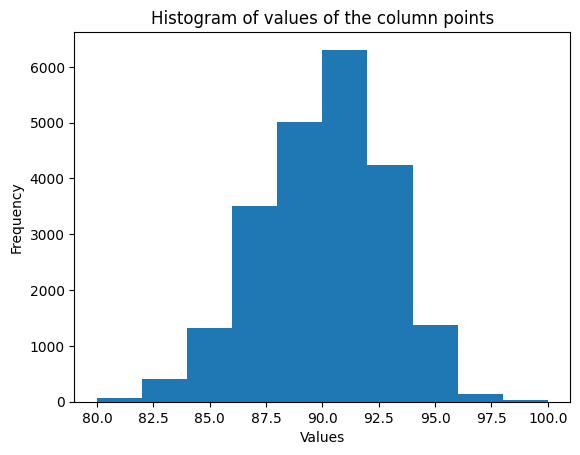

In [37]:
points = plt.hist(copy_wine_reviews.points)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of values of the column points")

Text(0.5, 1.0, 'Histogram of column values price')

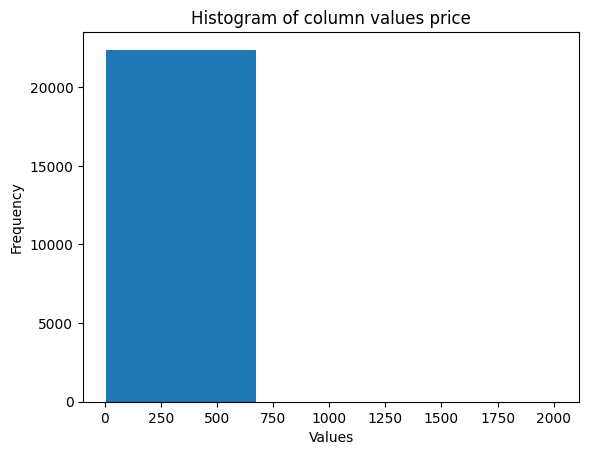

In [38]:
prices = plt.hist(copy_wine_reviews.price,bins=3)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of column values price")